# Motion in 2D and 3D

## Displacement and Velocity Vectors

### Displacement Vector
To describe motion in 2D and 3D, we must first define a coordinate system, including a convention of axes. *Recall that the sign of the acceleration due to gravity was determined by the convention that we chose.*  We usually use the Cartesian coordinate system to locate a particle at point $P(x,y,z)$ in 3 dimensions.  If the particle is moving , the variables $x,y,z$ are functions of time $t$.

The position vector $\vec{r}(t)$ locates the point P at time t from the origin, by

\begin{align}
\vec{r}(t) = x(t)\hat{i} + y(t)\hat{j} + z(t)\hat{k}.
\end{align}

```{figure-md} 3D-position-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/071341953cf3ad04041c5b06a713ba5ab3548eaf" alt="Position Vector"  style="max-width:100%; height:auto;">

Image Credit: OpenStax.
```

{numref}`3D-position-fig` shows the position vector $\vec{r}(t)$ for a particle located ar a time $t$. *Note that the orientation of the coordinate syste follows the right-hand rule.*

We can now define the 3D displacement vector $\Delta \vec{r}$ as the difference between the position vector $\vec{r}(t_2)$ at time $t_2$ and the initial position vector $\vec{r}(t_1)$ at time $t_1$, or

\begin{align}
\Delta \vec{r} = \vec{r}(t_2) - \vec{r}(t_1).
\end{align}

Three dimensional vector addition is performed in the same way as in 2D, by adding the corresponding components or graphically by using the head-to-tail method.

```{figure-md} 3D-displacement-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/85b4b075e91a332c7c7e45097501e6ec8404dbdf" alt="Displacement Vector"  style="max-width:100%; height:auto;">

Image Credit: OpenStax.
```
See the `python` code below that demonstates how to plot a 3D vector in `matplotlib`.

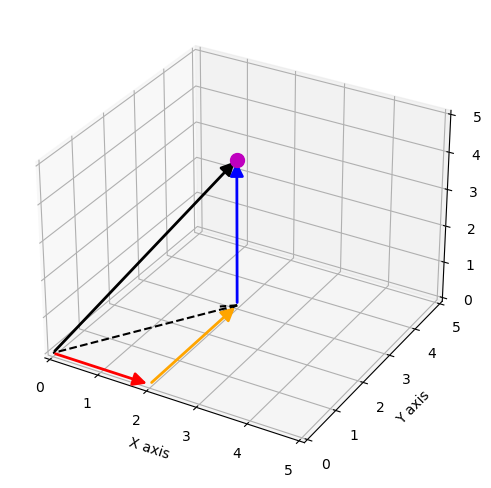

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Custom class to draw true 3D arrows (matplotlib does not support these natively)
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, mutation_scale=20, lw=2, arrowstyle="-|>", **kwargs):
        super().__init__((0, 0), (0, 0),mutation_scale=mutation_scale,lw=lw, arrowstyle=arrowstyle, **kwargs)
        self._verts3d = xs, ys, zs
    def do_3d_projection(self, renderer=None):
        xs, ys, zs = proj3d.proj_transform(*self._verts3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Set up the 3D plotting environment
fig, ax = plt.subplots(figsize=(8, 6), dpi=100,
                       subplot_kw=dict(projection="3d"))
# Define the vector components and endpoints
x0, y0, z0 = 0, 0, 0        # vector tail
u, v, w    = 2, 3, 4        # vector components
x1, y1, z1 = u, v, w        # vector head
# Draw the vector and its component projections
ax.add_artist(Arrow3D([x0, x1], [y0, y1], [z0, z1], color="k"))
ax.add_artist(Arrow3D([x0, x1], [y0, y0], [z0, z0], color="r"))
ax.add_artist(Arrow3D([x1, x1], [y0, y1], [z0, z0], color="orange"))
ax.add_artist(Arrow3D([x1, x1], [y1, y1], [z0, z1], color="b"))
# Plot the x-y vector
ax.quiver(x0, y0, z0, u, v, 0, color="k",
          ls="--", arrow_length_ratio=0.1)
ax.plot(x1, y1, z1, "mo", ms=10, zorder=5)  # mark the endpoint

# Formatting
ax.set_xlim(0, 5); ax.set_ylim(0, 5); ax.set_zlim(0, 5)
ax.set_xlabel("X axis"); ax.set_ylabel("Y axis"); ax.set_zlabel("Z axis")
plt.show()




### **Example Problem**: Polar Orbiting Satellite

```{exercise}
:class: etamu-exercise

**The Problem**

> A satellite is in a circular polar orbit around Earth at an altitude of $400\ \text{km}$, meaning it passes directly over the North and South Poles. What are the magnitude and direction of the displacement vector from when the satellite is directly over the North Pole to when it is at latitude $-45^\circ$?

---

**The Model**

Although the satellite moves along a curved path, the **displacement** depends only on the initial and final positions. We therefore model the motion using position vectors drawn from the center of Earth, which we take to be the origin of a Cartesian coordinate system.

We choose the $y$-axis to point north and the $x$-axis to point east. With this choice, the displacement vector is found by subtracting the initial position vector from the final position vector.

---

**The Math**

The radius of Earth is $6370\ \text{km}$, and the satellite orbits at an altitude of $400\ \text{km}$. The radius of the orbit is therefore

$$ r = 6370\ \text{km} + 400\ \text{km} = 6770\ \text{km}. $$

When the satellite is directly over the North Pole, its position vector points entirely in the $+y$ direction. The initial position vector is

$$ \vec{r}(t_1) = 6770\,\hat{j}\ \text{km}. $$

At latitude $-45^\circ$, the satellite’s position vector makes an angle of $-45^\circ$ with the $+x$-axis. The final position vector is therefore

$$ \vec{r}(t_2) = 6770(\cos(-45^\circ)\,\hat{i} + \sin(-45^\circ)\,\hat{j})\ \text{km}. $$

Evaluating the trigonometric functions gives

$$ \vec{r}(t_2) = (4.79\times10^3\,\hat{i} - 4.79\times10^3\,\hat{j})\ \text{km}. $$

The displacement vector is the difference between the final and initial position vectors,

$$ \Delta\vec{r} = \vec{r}(t_2) - \vec{r}(t_1)
= (4.79\times10^3\,\hat{i} - 1.16\times10^4\,\hat{j})\ \text{km}. $$

The magnitude of the displacement is

$$ |\Delta\vec{r}| = \sqrt{(4.79\times10^3)^2 + (1.16\times10^4)^2}
= 1.25\times10^4\ \text{km}. $$

The direction of the displacement relative to the $+x$-axis is

$$ \theta = \tan^{-1}\!\left(\frac{-1.16\times10^4}{4.79\times10^3}\right) = -67.5^\circ. $$

---

**The Conclusion**

The displacement of the satellite from the North Pole to latitude $-45^\circ$ has a magnitude of

$$ |\Delta\vec{r}| = 1.25\times10^4\ \text{km}, $$

and points $67.5^\circ$ south of east. Even though the satellite follows a curved path along its orbit, the displacement represents the straight-line separation between the two positions.

---

**The Verification**

We can verify the analytical result numerically by computing the position vectors and their difference using Python. The magnitude and direction obtained numerically match the analytical values, confirming the result.

```



Orbit radius r        = 6770 km
Displacement |dr|     = 1.25e+04 km
Direction angle theta = -67.5 deg


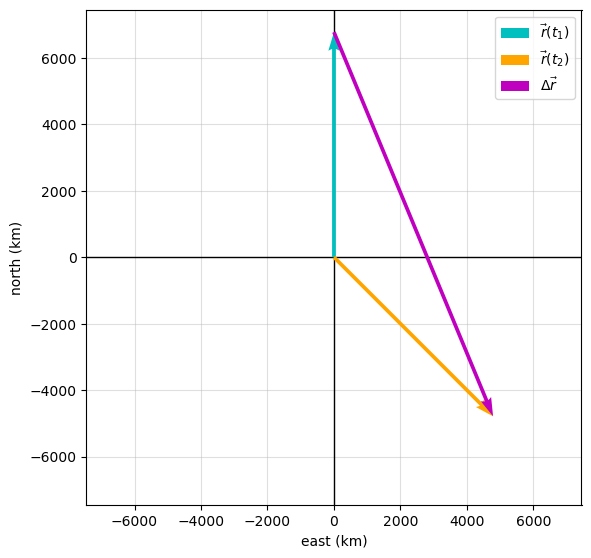

In [9]:
# Verification of polar orbit displacement problem
import numpy as np
import matplotlib.pyplot as plt

# Given values
R_earth = 6370.0          # km
h = 400.0                 # km
r = R_earth + h           # km
lat2 = -45.0              # degrees

# Position vectors (x is east, y is north)
r1 = np.array([0.0, r])   # over North Pole
r2 = r * np.array([np.cos(np.radians(lat2)),
                   np.sin(np.radians(lat2))])
# Displacement vector
dr = r2 - r1
# Magnitude and direction (angle from +x axis)
dr_mag = np.linalg.norm(dr)
theta = np.degrees(np.arctan2(dr[1], dr[0]))

# Print results
print(f"Orbit radius r        = {r:.0f} km")
print(f"Displacement |dr|     = {dr_mag:.2e} km")
print(f"Direction angle theta = {theta:.1f} deg")

# Create a vector plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot axes and vectors
ax.axhline(0, lw=1,color='k',zorder=2)
ax.axvline(0, lw=1,color='k',zorder=2)
ax.quiver(0, 0, r1[0], r1[1], color='c', zorder=5,
          angles='xy', scale_units='xy', scale=1, label=r'$\vec{r}(t_1)$')
ax.quiver(0, 0, r2[0], r2[1], color='orange', zorder=5,
          angles='xy', scale_units='xy', scale=1, label=r'$\vec{r}(t_2)$')
ax.quiver(r1[0], r1[1], dr[0], dr[1], color='m', zorder=5,
          angles='xy', scale_units='xy', scale=1, label=r'$\Delta\vec{r}$')

# Formatting
ax.set_aspect('equal', adjustable='box')
lim = 1.1 * r
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xlabel("east (km)")
ax.set_ylabel("north (km)")
ax.grid(True, alpha=0.4)
ax.legend()

plt.tight_layout()
plt.show()

### Velocity Vector
Previously, we defined the velocity in 1D through the derivative of $x(t)$.  To expand it to 2D or 3D, we simply replace $x(t) \rightarrow \vec{r}(t)$ to get

\begin{align}
\vec{\rm v}(t) &= \lim_{\Delta t\rightarrow 0} \frac{\vec{r}(t+\Delta t)-
\vec{r}(t)}{\Delta t} = \frac{d\vec{r}}{dt}.
\end{align}

The vectors $\vec{r}(t)$ and $\vec{r}(t + \Delta t)$ represent intantaneous states of the displacement vector $\vec{r}$ at two times.  The path of a particle located by the vector is the resultant (difference) vector $\Delta \vec{r}$, which connects from head-to-head (see Fig. {numref}`{number}<3D-path-fig>`).

```{figure-md} 3D-path-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/757906ca98f3ecf2f5d3ccd666566aaf2ff3dfcc" alt="Path Difference Vector"  style="max-width:100%; height:auto;">

Image Credit: OpenStax.
```

The velocity vector $\vec{\rm v}$ can also be written in components, where each component is now time-dependent ($v_x(t),\ v_y(t),\ v_z(t)$).  Mathematically, the progression from the displacement to the velocity vector is given by

\begin{align}
\vec{r} &= x(t)\hat{i} + y(t)\hat{j} + z(t)\hat{k}, \\
\vec{\rm v} &= v_x(t)\hat{i} + v_y(t)\hat{j} + v_z(t)\hat{k},
\end{align}

where

\begin{align}
v_x(t) = \frac{dx(t)}{dt}, \quad & v_y(t) = \frac{dy(t)}{dt}, \quad & v_z(t) = \frac{dz(t)}{dt}.
\end{align}

The average velocity $\bar{v}$ was described as a vector in the previous chapter, and there is a 2D or 3D equivalent given as

\begin{align}
\vec{\rm v}_{\rm avg}(t_2,t_1) = \frac{\vec{r}(t_2)-\vec{r}(t_1)}{t_2-t_1}.
\end{align}

```{admonition} Typesetting the Velocity Vector
:class: note

To make distinction between the velocity vector $\vec{\rm v}$ and its components ($v_x,\ v_y,\ v_z$), we use the roman font command `\rm`.  This is a convention just to make things clearer.
```

### **Example Problem**: Calculating the Velocity Vector
````{exercise}
:class: etamu-exercise

**The Problem**

>The position function of a paricle is  
$\vec{r}(t) = (2.0t^2)\,\hat{i} + (2.0 + 3.0t)\,\hat{j} + 5.0\,\hat{k}\ \text{km}.$  (a) What is the instantaneous velocity vector and speed at $t = 2.0\ \text{s}$? (b) What is the average velocity between $t = 1.0\ \text{s}$ and $t = 3.0\ \text{s}$?

---

**The Model**

The velocity of a particle is obtained by taking the time derivative of its position vector. The instantaneous velocity is evaluated at a specific time, while the average velocity is defined as the change in position divided by the elapsed time interval.

We compute both quantities using vector calculus and then compare the results.

---

**The Math**

The velocity vector is the time derivative of the position vector,

$$\vec{v}(t) = \frac{d\vec{r}}{dt}.$$

Taking the derivative of each component gives

$$\vec{v}(t) = (4.0t)\,\hat{i} + 3.0\,\hat{j} + 5.0\,\hat{k}\ \text{km/s}.$$

Evaluating this expression at $t = 2.0\ \text{s}$,

$$\vec{v}(2.0) = 8.0\,\hat{i} + 3.0\,\hat{j} + 5.0\,\hat{k}\ \text{km/s}.$$

The speed is the magnitude of the velocity vector,

$$|\vec{v}(2.0)| = \sqrt{(8.0)^2 + (3.0)^2 + (5.0)^2} = 9.9\ \text{km/s}.$$

To find the average velocity, we use its definition,

$$\vec{v}_{\text{avg}} = \frac{\vec{r}(t_2) - \vec{r}(t_1)}{t_2 - t_1}.$$

Evaluating the position vector at $t_1 = 1.0\ \text{s}$ and $t_2 = 3.0\ \text{s}$,

\begin{align*}
\vec{r}(1.0) &= 2\,\hat{i} + 5\,\hat{j} + 5\,\hat{k}\ \text{km},\\
\vec{r}(3.0) &= 18\,\hat{i} + 11\,\hat{j} + 5\,\hat{k}\ \text{km}.
\end{align*}

Substituting into the average velocity expression,

\begin{align*}
\vec{v}_{\text{avg}} &= \frac{(16\,\hat{i} + 6\,\hat{j} + 10\,\hat{k})\ \text{km}}{2.0\ \text{s}}, \\
&= 8.0\,\hat{i} + 3.0\,\hat{j} + 5.0\,\hat{k}\ \text{km/s}.
\end{align*}

```{admonition} Symbolic Differentiation in Python
:class: tip, dropdown

[SymPy](https://www.sympy.org/en/index.html) can differentiate symbols instead of numbers. If you write each component of $\vec{r}(t)$ as a symbolic expression in $t$, then `diff(...)` returns the derivative exactly. After that, you can substitute a specific value like $t=2.0$ using `.subs(t, 2.0)` and convert to a float with `float(...)`.

This is especially useful when $\vec{r}(t)$ is complicated and you want to avoid algebra mistakes.
```

---

**The Conclusion**

At $t = 2.0\ \text{s}$, the instantaneous velocity of the particle is

$$\vec{v}(2.0) = 8.0\,\hat{i} + 3.0\,\hat{j} + 5.0\,\hat{k}\ \text{km/s},$$

with a speed of $9.9\ \text{km/s}$. The average velocity between $t = 1.0\ \text{s}$ and $t = 3.0\ \text{s}$ is equal to the instantaneous velocity at $t = 2.0\ \text{s}$ because the velocity varies linearly with time.

---

**The Verification**

We can verify these results numerically by differentiating the position function and evaluating both the instantaneous and average velocities directly using Python.

```python
# Verification of velocity vector problem
import numpy as np

# Define the position function
def r(t):
    return np.array([2.0*t**2, 2.0 + 3.0*t, 5.0])

# Times
t1 = 1.0
t2 = 3.0
t_eval = 2.0

# Instantaneous velocity (analytical derivative)
v_inst = np.array([4.0*t_eval, 3.0, 5.0])
speed = np.linalg.norm(v_inst)

# Average velocity
v_avg = (r(t2) - r(t1)) / (t2 - t1)

# Print results
print(f"Instantaneous velocity at t = 2.0 s: {v_inst} km/s")
print(f"Speed at t = 2.0 s: {speed:.1f} km/s")
print(f"Average velocity from 1.0 s to 3.0 s: {v_avg} km/s")
```
````

In [23]:
# Verification of velocity vector problem (with SymPy differentiation)
import numpy as np
import sympy as sp

def array_from_sympy(r, t, t_val):
    temp = np.zeros(3)
    for i in range(3):
        temp[i] = float(r[i].subs(t, t_val))
    return temp

# Symbolic variable
t = sp.Symbol('t', real=True)

# Symbolic position components (km)
x_t = 2.0*t**2
y_t = 2.0 + 3.0*t
z_t = 5.0*t
r_t = [x_t, y_t, z_t]

# Symbolic velocity components (km/s)
vx_t = sp.diff(x_t, t)
vy_t = sp.diff(y_t, t)
vz_t = sp.diff(z_t, t)

# Evaluate instantaneous velocity at t = 2.0 s
t_eval = 2.0
v_inst_sym = sp.Matrix([vx_t, vy_t, vz_t]).subs(t, t_eval)
v_inst = array_from_sympy([vx_t, vy_t, vz_t], t, t_eval)
speed = np.linalg.norm(v_inst)

# Average velocity from t1 to t2
t1 = 1.0
t2 = 3.0
r1 = array_from_sympy(r_t, t, t1)
r2 = array_from_sympy(r_t, t, t2)
v_avg = (r2 - r1) / (t2 - t1)

# Print results (formatted numerical output)
print(f"Instantaneous velocity at t = {t_eval:.1f} s: {v_inst} km/s")
print(f"Speed at t = {t_eval:.1f} s: {speed:.1f} km/s")
print(f"Average velocity from {t1:.1f} s to {t2:.1f} s: {v_avg} km/s")


Instantaneous velocity at t = 2.0 s: [8. 3. 5.] km/s
Speed at t = 2.0 s: 9.9 km/s
Average velocity from 1.0 s to 3.0 s: [8. 3. 5.] km/s


### The Independence of Perpendicular Motions

When we look at the 3D equations for position and velocity written in unit vector notation, we see the components are separate and unique funcitons of time that **do not** depend on each other.

- Motion along the $x$ direction has not part of its motion along the $y$ or $z$ directions.

Thus the motion of an object in 2D or 3D can be divided (separated) into independent motions along the perpendicular coordinate axes.

Consider a woman walking from point A to point B in a city with square blocks.  The woman taking the path from A to B may walk east, then north for several blocks to arrive at point B.  How far she walks east is affected only by her motion eastward (*Recall the chessboard from Chapter 2*).

```{note}
In kinematics, we can treat the horizontal and vertical components of motion separately.  In many cases, motion in the horizontal direction does not affect the motion in the vertical direction and vice versa.
```

We can illustrate this with a stroboscope that captures the positions of two balls at fixed time intervals.  One ball is dropped from rest and the other is thrown horizontally from the same height and follows a curved path (*parabola*).

```{figure-md} independent-path-fig
<img src="projectile_components_snapshots.gif" alt="Independent motion"  style="max-width:70%; height:auto;">

The red ball falls straight down, while the blue ball moves horizontally at constant speed while accelerating vertically. At equal time intervals, both objects have the same vertical position, as indicated by the dashed horizontal lines. The velocity and acceleration vectors illustrate that horizontal motion does not affect vertical motion. The animation was generated using Python, with AI-assisted code development (ChatGPT).
```

Careful examination of the blue ball shows it travels the same horizontal distance between flashes.  This is because there is only 1 force (gravity downward) acting on the ball after it is thrown.  This means the horizontal velocity is constant.  *Note that in the real world, air resistance would affect the speed of the ball in both directions.*



## Acceleration Vector
### Instantaneous Acceleration

The **acceleration vector** $\vec{a}(t)$ is the intantaneous acceleration at any point in time along an object's trajectory.  It can be obtain in a similar way as was the velocity vector.  Taking the derivative of $\vec{\rm v}(t)$ with respect to time, we find

\begin{align}
\vec{a}(t) &= \lim_{\Delta t\to 0}\frac{\vec{\rm v}(t+\Delta t)-\vec{\rm v}(t)}{\Delta t} = \frac{d\vec{\rm v}(t)}{dt}.
\end{align}

In terms of components we have the following form

\begin{align}
\vec{a}(t) &= \frac{dv_x(t)}{dt}\,\hat{i} + \frac{dv_y(t)}{dt}\,\hat{j} + \frac{dv_z(t)}{dt}\,\hat{k},\\
&= \frac{d^2x(t)}{dt^2}\,\hat{i} + \frac{d^2y(t)}{dt^2}\,\hat{j} + \frac{d^2z(t)}{dt^2}\,\hat{k}.
\end{align}


### **Example Problem**: Finding an Acceleration Vector
````{exercise}
:class: etamu-exercise

**The Problem**

> A particle has a velocity of  $\vec{\rm v}(t) = 5.0t\,\hat{i} + t^2\,\hat{j} - 2.0t^3\,\hat{k}\ \text{km/s}.$  (a) What is the acceleration function?  (b) What is the acceleration vector at $t = 2.0\ \text{s}$? Find its magnitude and direction.

---

**The Model**

The acceleration of a particle is defined as the time derivative of its velocity. Because the velocity is given in unit-vector form, the acceleration can be found by differentiating each component of the velocity function with respect to time.

Once the acceleration function is known, it can be evaluated at a specific time. The magnitude of the acceleration is then found using the Euclidean distance (norm) of the acceleration vector.

---

**The Math**

The acceleration function is the derivative of the velocity function,

$$\vec{a}(t) = \frac{d\vec{\rm v}(t)}{dt}.$$

Taking the derivative component-by-component gives

$$\vec{a}(t) = 5.0\,\hat{i} + 2.0t\,\hat{j} - 6.0t^2\,\hat{k}\ \text{km/s}^2.$$

Evaluating the acceleration at $t = 2.0\ \text{s}$,

$$\vec{a}(2.0) = 5.0\,\hat{i} + 4.0\,\hat{j} - 24.0\,\hat{k}\ \text{km/s}^2.$$

The magnitude of the acceleration is

$$|\vec{a}(2.0)| = \sqrt{(5.0)^2 + (4.0)^2 + (-24.0)^2} = 24.8\ \text{km/s}^2.$$

---

**The Conclusion**

The acceleration of the particle is time dependent and is given by

$$\vec{a}(t) = 5.0\,\hat{i} + 2.0t\,\hat{j} - 6.0t^2\,\hat{k}\ \text{km/s}^2.$$

At $t = 2.0\ \text{s}$, the acceleration vector has a magnitude of $24.8\ \text{km/s}^2$ and points in the direction $5.0\,\hat{i} + 4.0\,\hat{j} - 24.0\,\hat{k}$. This example illustrates that acceleration can vary with time when the velocity function is nonlinear.

---

**The Verification**

In the verification step, the acceleration vector is represented as a NumPy array. This allows us to treat the components of the vector in the same way we would treat a vector written in unit-vector notation. Each element of the array corresponds to one Cartesian component of the acceleration.

The function `np.linalg.norm` computes the Euclidean norm of the array, which is the magnitude of the vector. For a vector with components $(a_x,\ a_y,\ a_z)$, this corresponds to the familiar expression

$$|\vec{a}| = \sqrt{a_x^2 +a_y^2 +a_z^2}. $$

Using arrays in this way provides a direct numerical check of the analytical result and reinforces the connection between vector algebra and computational methods.

```python
# Verification of acceleration vector
import numpy as np

t = 2.0

# Acceleration components (km/s^2)
a = np.array([5.0, 2.0*t, -6.0*t**2])

# Magnitude
a_mag = np.linalg.norm(a)

print(f"a(2.0 s) = {a} km/s^2")
print(f"|a(2.0 s)| = {a_mag:.1f} km/s^2")
```
````

### **Example Problem**: Finding a Particle Acceleration
````{exercise}
:class: etamu-exercise

**The Problem**

> A particle has a position function  $\vec{r}(t) = (10t - t^2)\,\hat{i} + 5t\,\hat{j} + 5t\,\hat{k}\ \text{m}.$  (a) What is the velocity?  (b) What is the acceleration? (c) Describe the motion from $t = 0\ \text{s}$.

---

**The Model**

Velocity is the first time derivative of the position function, and acceleration is the second time derivative. Because the position is linear in $y$ and $z$, the acceleration in those directions is zero. The motion in the $x$ direction is quadratic in time, which implies a constant acceleration and a possible reversal in direction.

---

**The Math**

The velocity is obtained by differentiating the position function,

$$
\vec{\rm v}(t) = \frac{d\vec{r}(t)}{dt}
          = (10 - 2t)\,\hat{i} + 5\,\hat{j} + 5\,\hat{k}\ \text{m/s}.
$$

The acceleration is the derivative of the velocity,

$$
\vec{a}(t) = \frac{d\vec{\rm v}(t)}{dt}
          = -2\,\hat{i}\ \text{m/s}^2.
$$

---

**The Conclusion**

The particle moves with constant velocities in the $y$ and $z$ directions and a constant acceleration in the negative $x$ direction. Initially, the particle moves in the positive $x$ direction, but its velocity in $x$ decreases linearly and becomes zero at $t = 5\ \text{s}$. At this time, the particle reverses direction and accelerates back toward smaller $x$ values. The particle reaches a maximum $x$ position of $25\ \text{m}$ and returns to $x = 0$ at $t = 10\ \text{s}$.

---

**The Verification**

To visualize the motion, we compute the particle’s position at evenly spaced times and plot the resulting trajectory in three dimensions. The plotted points represent the particle’s position at equal time intervals, allowing us to clearly see the turnaround in the $x$ direction while motion in $y$ and $z$ continues steadily.

```{note}
A visualization using `plotly` is given below so that you can interact with the figure to see different perspectives.  *You are not expected to know to generate figures with plotly.*
```

```python
# Verification of particle motion from the position function
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(0, 10, 15)

# Position components (m)
x = 10*t - t**2
y = 5*t
z = 5*t

# Create 3D plot
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(111, projection='3d')

# Plot trajectory points
ax.scatter(x, y, z, color='tab:blue', s=40)

# Highlight the turnaround point at t = 5 s
t_turn = 5.0
x_turn = 10*t_turn - t_turn**2
y_turn = 5*t_turn
z_turn = 5*t_turn
ax.scatter(x_turn, y_turn, z_turn, color='tab:red', s=60)

# Axes labels
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")

# Set limits for clarity
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
ax.set_zlim(0, 50)
ax.view_init(elev=25, azim=135)

plt.tight_layout()
plt.show() 
```

````

In [37]:
import numpy as np, plotly.graph_objects as go
from IPython.display import HTML

t=np.linspace(0,10,60); x=10*t-t**2; y=5*t; z=5*t; L=55; A=0.18*L

fig=go.Figure()
fig.add_trace(go.Scatter3d(x=x,y=y,z=z,mode='markers',name='',
    marker=dict(size=7,color=t,colorscale='Viridis',opacity=0.9,showscale=True,
    colorbar=dict(title="time (s)",thickness=18,len=0.9,x=1.03,tickfont=dict(size=14))),showlegend=False))

def axis_line(p,q): fig.add_trace(go.Scatter3d(x=[p[0],q[0]],y=[p[1],q[1]],z=[p[2],q[2]],mode='lines',
                                              line=dict(color='black',width=6),hoverinfo='skip',showlegend=False,name=''))
def axis_tip(px,py,pz,ux,uy,uz): fig.add_trace(go.Cone(x=[px],y=[py],z=[pz],u=[ux],v=[uy],w=[uz],anchor='tip',
                                                      sizemode='absolute',sizeref=6,showscale=False,
                                                      colorscale=[[0,'black'],[1,'black']],hoverinfo='skip',showlegend=False,name=''))
def axis_label(px,py,pz,txt): fig.add_trace(go.Scatter3d(x=[px],y=[py],z=[pz],mode='text',text=[txt],
                                                        textfont=dict(size=16,color='black'),hoverinfo='skip',showlegend=False,name=''))

axis_line((-L,0,0),( L,0,0)); axis_line((0,-L,0),(0, L,0)); axis_line((0,0,-L),(0,0, L))
axis_tip( L,0,0,  A,0,0); axis_tip(-L,0,0,-A,0,0); axis_tip(0, L,0,0, A,0); axis_tip(0,-L,0,0,-A,0); axis_tip(0,0, L,0,0, A); axis_tip(0,0,-L,0,0,-A)
axis_label( 1.12*L,0,0,"x"); axis_label(-1.12*L,0,0,"-x"); axis_label(0, 1.12*L,0,"y"); axis_label(0,-1.12*L,0,"-y"); axis_label(0,0, 1.12*L,"z"); axis_label(0,0,-1.12*L,"-z")

fig.update_layout(width=800, height=700,margin=dict(l=0,r=0,b=0,t=20),showlegend=False,
    scene=dict(aspectmode='cube',
        xaxis=dict(range=[-1.2*L,1.2*L],showbackground=False,showticklabels=False,showgrid=False,zeroline=False,title=''),
        yaxis=dict(range=[-1.2*L,1.2*L],showbackground=False,showticklabels=False,showgrid=False,zeroline=False,title=''),
        zaxis=dict(range=[-1.2*L,1.2*L],showbackground=False,showticklabels=False,showgrid=False,zeroline=False,title='')))

HTML(fig.to_html(full_html=False, include_plotlyjs="cdn"))

### Constant Acceleration
Constant acceleration in 2D or 3D can be treated the samy way as in the previous chapter.  To develop the relvant equations, let's consider the 2D problem of a particle moving in the $xy$ plane with constant acceleration.  The acceleration vector $\vec{a}$ is given aa

$$ \vec{a} = a_x\hat{i} + a_y\hat{j}. $$

Each of the kinematic equations for 1D motion now has component-forms that define the equation in the $x$- and $y$-directions.  We can write the equations as

\begin{align}
x(t) &= x_o + \left(v_x\right)_{\rm avg} t, \quad & v_x(t) &= v_{ox} + a_x t, \\
x(t) &= x_o + v_{ox}t + \frac{1}{2}a_x t^2, \quad & v_x^2(t) &= v_{ox}^2 + 2a_x(x-x_o).
\end{align}

and

\begin{align}
y(t) &= y_o + \left(v_y\right)_{\rm avg} t, \quad & v_y(t) &= v_{oy} + a_y t, \\
y(t) &= y_o + v_{oy}t + \frac{1}{2}a_y t^2, \quad & v_y^2(t) &= v_{oy}^2 + 2a_y(y-y_o).
\end{align}

Here the subscript $o$ refers initial value at $t=0$.  The position and velocity vectors in 2D are given as

\begin{align*}
\vec{r}(t) &= x(t)\hat{i} + y(t)\hat{j}, \\
\vec{\rm v}(t) &= v_x(t)\hat{i} + v_y(t)\hat{j}.
\end{align*}

### **Example Problem**: A Skier


````{exercise}
:class: etamu-exercise

**The Problem**

> Figure {numref}`{number}<skier-fig>` shows a skier moving with an acceleration of $2.1\ \text{m/s}^2$ down a slope of $15^\circ$ at $t = 0$. With the origin of the coordinate system at the front of the lodge, her initial position and velocity are  
>
> $$\vec{r}(0) = (75.0\hat{i} - 50.0\hat{j})\ \text{m}$$  
>
> and  
>
> $$\vec{v}(0) = (4.1\hat{i} - 1.1\hat{j})\ \text{m/s}.$$  
>
> (a) What are the $x$- and $y$-components of the skier’s position and velocity as functions of time? (b) What are her position and velocity at $t = 10.0\ \text{s}$?

```{figure-md} skier-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/7f4e56f07c561c08b1c8dd695347df4eacbd36aa" alt="skier problem"  style="max-width:60%; height:auto;">

Image Credit: Openstax
```

---

**The Model**

We treat the skier’s motion as two-dimensional with *constant* acceleration. The acceleration has a fixed magnitude of $2.1\ \text{m/s}^2$ directed $15^\circ$ below the $+x$ axis, so we first resolve it into components. Then we apply the constant-acceleration kinematic equations separately in the $x$ and $y$ directions.

The sign of each acceleration component is determined by the chosen coordinate system. The $x$-axis is taken to be horizontal and positive in the direction of motion down the slope, so the $x$-component of the acceleration is positive. The $y$-axis is defined to point vertically upward, while the skier accelerates downward along the slope. Therefore, the vertical component of the acceleration points in the negative $y$ direction. Therefore, $a_y$ carries a *negative* sign when the acceleration vector is resolved into components.

```{admonition} Common mistake
:class: note, dropdown

A frequent mistake is to assume the acceleration is negative simply because the skier is moving downhill. The sign of each component does **not** depend on whether the motion is "uphill" or "downhill," but on how the coordinate axes are defined. In this problem, the $y$-axis points upward, so any downward component of acceleration must be negative, regardless of the direction of motion along the slope.
```

---

**The Math**

Because the skier accelerates down the slope at $15^\circ$, the acceleration components are

\begin{align*}
a_x &= (2.1)\cos(15^\circ) = 2.0\ \text{m/s}^2,\\
a_y &= -(2.1)\sin(15^\circ)= -0.54\ \text{m/s}^2.
\end{align*}

**(a)** Component functions 

Starting with the components from the initial vectors, the $x$ motion has $x_0 = 75.0\ \text{m}$ and $v_{xo} = 4.1\ \text{m/s}$, which gives

\begin{align*}
x(t) &= x_0 + v_{xo}t + \frac{1}{2}a_xt^2 ,\\
&= 75.0 + 4.1t + \frac{1}{2}(2.0)t^2, \\
v_x(t) &= v_{xo} + a_xt = 4.1 + (2.0)t.
\end{align*}

For the $y$ motion with $y_0 = -50.0\ \text{m}$ and $v_{yo} = -1.1\ \text{m/s}$,

\begin{align*}
y(t) &= y_0 + v_{yo}t + \frac{1}{2}a_yt^2,\\
& = -50.0 - 1.1t + \frac{1}{2}(-0.54)t^2, \\
v_y(t) &= v_{yo} + a_yt = -1.1 + (-0.54)t.
\end{align*}

**(b) Values at $t = 10.0\ \text{s}$**

Substituting $t = 10.0$, we get:

\begin{align*}
x(10.0) = 75.0 + 4.1(10.0) + \frac{1}{2}(2.0)(10.0)^2, = 216.0\ \text{m}, \\
v_x(10.0) = 4.1 + (2.0)(10.0) = 24.1\ \text{m/s},
\end{align*}

and

\begin{align*}
y(10.0) &= -50.0 - 1.1(10.0) + \frac{1}{2}(-0.54)(10.0)^2 = -88.0\ \text{m},\\
v_y(10.0) &= -1.1 + (-0.54)(10.0) = -6.5\ \text{m/s}.
\end{align*}

So the position and velcoity at $t=10.0\ {\rm s}$ is,

\begin{align*}
\vec{r}(10.0) &= (216.0\hat{i} - 88.0\hat{j})\ \text{m}, \\
\vec{v}(10.0) &= (24.1\hat{i} - 6.5\hat{j})\ \text{m/s}.
\end{align*}

---

**The Conclusion**

The skier’s component equations of motion are

\begin{align*}
x(t) &= 75.0 + 4.1t + \frac{1}{2}(2.0)t^2, \\
v_x(t) &= 4.1 + 2.0t,$$
\end{align*}

and

\begin{align*}
y(t) &= -50.0 - 1.1t + \frac{1}{2}(-0.54)t^2, \\
v_y(t) &= -1.1 - 0.54t.
\end{align*}

At $t = 10.0\ \text{s}$, her position and velocity are

\begin{align*}
\vec{r}(10.0) &= (216.0\hat{i} - 88.0\hat{j})\ \text{m}, \\
\vec{v}(10.0) &= (24.1\hat{i} - 6.5\hat{j})\ \text{m/s}.
\end{align*}

This example shows that once the acceleration is resolved into components, the $x$ and $y$ motions can be solved independently using the same kinematic equations.

---

**The Verification**

We verify the result numerically by computing the acceleration components, building $x(t)$ and $y(t)$ from the kinematic equations, and evaluating the position and velocity at $t = 10.0\ \text{s}$. The printed values match the analytical results.

```python
# Verification of skier motion on an inclined slope
import numpy as np

# Given values
a = 2.1
theta = np.radians(15.0)
x0, y0 = 75.0, -50.0
vx0, vy0 = 4.1, -1.1
t = 10.0

# Acceleration components
ax = a*np.cos(theta)
ay = -a*np.sin(theta)

# Position and velocity at t
x = x0 + vx0*t + 0.5*ax*t**2
y = y0 + vy0*t + 0.5*ay*t**2
vx = vx0 + ax*t
vy = vy0 + ay*t

print(f"ax = {ax:.1f} m/s^2, ay = {ay:.2f} m/s^2")
print(f"r(10.0 s) = <{x:.1f}, {y:.1f}> m")
print(f"v(10.0 s) = <{vx:.1f}, {vy:.1f}> m/s")
```
````

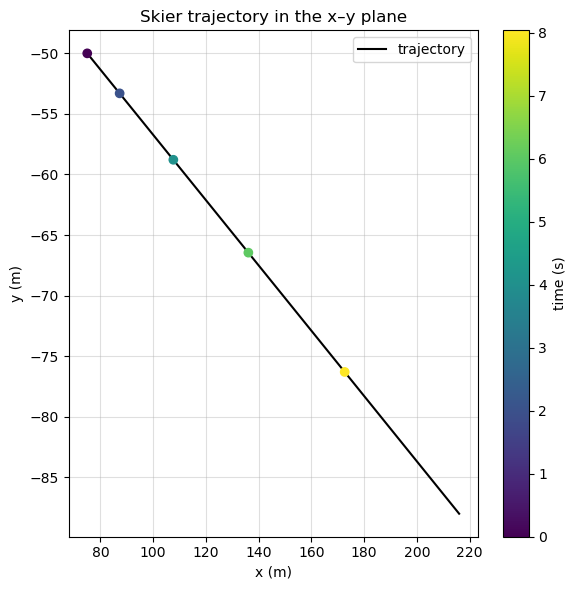

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(0, 10, 200)

# Motion equations
x = 75.0 + 4.1*t + 0.5*2.0*t**2
y = -50.0 - 1.1*t + 0.5*(-0.54)*t**2

# Plot trajectory
plt.figure(figsize=(6,6))
plt.plot(x, y, 'k-',lw=1.5,label="trajectory")
plt.scatter(x[::40], y[::40], c=t[::40], cmap="viridis", zorder=3)

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Skier trajectory in the x–y plane")
#plt.gca().invert_yaxis()  # optional: downhill visually downward
plt.grid(True, alpha=0.4)
plt.colorbar(label="time (s)")
plt.legend()

plt.tight_layout()
plt.show()


### Projectile Motion
**Projectile motion** describes the motion of an object that is thrown or launched into the air, *subject only to acceleration due to gravity*.  Some examples of projectile motion includes

- meteors entering Earth's atmosphere,
- fireworks,
- cannonballs/bullets,
- any ball in sports.

The launched/thrown object is called a *projectile* and its path is called a **trajectory**.  We consider 2D projectile motion, which neglects the effects of air resistance.

In projectile motion problems, the *motions along perpendicular axes are independent* and thus can be analyzed separately.  The key to analyzing such problems is to break (or separate) the problem into two motions: (a) along the horizontal axis and (b) along the vertical axis.  By convention, we call the horizonal axis the $x$-axis and the vertical axis the $y$-axis.

We define a vector $\vec{s}$ to describe the total displacement, while the vectors $\vec{x}$ and $\vec{y}$ are its component vectors along the respective axes.  The magnitudes of these vectors are without arrows: $s,\ x,\ \text{and}\ y$.

```{figure-md} soccer-ball-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/9e3e2eafa36aebeff3bd348ccfddf01346266851" alt="soccer ball problem"  style="max-width:70%; height:auto;">

Image Credit: Openstax
```

Figure {numref}`{number}<soccer-ball-fig>` illustrates these vectors with a soccer player kicking a ball.

- **How can we represent these vectors in unit vector notation?**

They can be represented by

\begin{align*}
\vec{s} &= \vec{x} + \vec{y}, \\
\vec{x} &= x\hat{i} = s\cos{\Phi}\, \hat{i}, \\
\vec{y} &= y\hat{i} = s\sin{\Phi}\, \hat{j}.
\end{align*}

To describe the projectile motion completely, we must also include velocity and acceleration.  Let's assume that contact forces (e.g., air resistance and friction) are negligible.  Defining the positive direction as upward, the components of acceleration are:

$$ a_y = -g = -9.81\ {\rm m/s^2} \quad (-32.2\ {\rm ft/s^2}). $$

Because gravity is vertical, $a_x = 0$ and $v_x = v_{ox}$.  We can then write the kinematic equations for motion in a uniform gravitational field as

\begin{align}
x &= x_o + v_{ox} t, \quad & y &= y_o + v_{oy} t - \frac{1}{2}gt^2, \\
v_x &= v_{ox}, \quad & v_y &= v_{oy} - gt,\\
&  & v_y^2 &= v_{oy}^2 - 2g(y-y_o).
\end{align}

Using this set of equations, we can analyze projectile motion.  When the air resistance is negligible, the maximum height of the projectile is given by

\begin{align*}
 v_y^2 &= v_{oy}^2 - 2g(y-y_o) = 0. \\
 y-y_o &= \frac{v_{oy}^2}{2g},\\
 h &=  \frac{v_{oy}^2}{2g} = \frac{v_o^2\sin^2{\theta_o}}{2g},
\end{align*}

where $h = y-y_o$ and $v_y = 0$.  This equation defines the *maximum height of a projectile above its launch position* and it depends only on $v_{oy}$.

```{admonition}  Projectile Height (Calculus-framing)
:class: tip, dropdown


Here we show how to find the maximum height from one of the kinematic equations.  However, you can also think of this in terms of the $y$ position equation using calculus.  In calculus, you find the first derivative and set it equal to zero, or 

\begin{align*}
y &= y_o + v_{oy}t - \frac{1}{2}gt^2, \\
\frac{dy}{dt} &= v_{oy} - gt = 0, \\
t &= \frac{v_{oy}}{g},
\end{align*}

which gives the time it takes to reach the maximum height.  Then we substitute back into the position equation (and re-arrange to for $h=y-y_o$) to get

\begin{align*}
y-y_o &= v_{oy}\frac{v_{oy}}{g} - \frac{g}{2}\left(\frac{v_{oy}}{g}
\right)^2, \\
h &= \frac{v_{oy}^2}{2g} = \frac{v_o^2\sin^2{\theta_o}}{2g}.
\end{align*}
```

```{admonition} Problem Solving Strategy
:class: note

1. Resolve the motion into $x$ and $y$ components, where the components of velocity $\vec{\rm v}$ are $v_x = v\cos{\theta}$ and $v_y=v\sin{\theta}$.  The magnitude of velocity is $v$ and $\theta$ is the direction relative to the $x$ axis.  See Fig. {numref}`{number}<projectile-components-fig>`.
2. Treat the motionas 2 independent 1D motions: (a) one horizontal and (b) one vertical.
3. Solve for the unknowns in the two separate motions.  Note that the only comon variable between the motions is time $t$. 
4. Recombine quantities in the horizontal and vertical directions to find the total displacement $\vec{s}$ and velocity $\vec{\rm v}$.  Solve for the magnitude and direction using

    $$s = \sqrt{x^2+y^2}, \quad \Phi = \tan^{-1}\left(\frac{y}{x}\right), \quad v = \sqrt{v_x^2 + v_y^2}, $$

where $\Phi$ is the direction of $\vec{s}$.

```

```{figure-md} projectile-components-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/bb26c6736eceb5e35d39e00e54cfb20a30360038" alt="projectile components"  style="max-width:70%; height:auto;">

Image Credit: Openstax
```



### **Example Problem**: A Fireworks Projectile Explodes

````{exercise}
:class: etamu-exercise

**The Problem**

> During a fireworks display, a shell is shot into the air with an initial speed of $70.0\ \text{m/s}$ at an angle of $75.0^\circ$ above the horizontal, as illustrated in Figure {numref}`{number}<fireworks-fig>`. The fuse is timed to ignite the shell just as it reaches its highest point above the ground.  (a) Calculate the height at which the shell explodes.  (b) How much time passes between the launch of the shell and the explosion? (c) What is the horizontal displacement of the shell when it explodes? (d) What is the total displacement from the point of launch to the highest point?

```{figure-md} fireworks-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/9ed061e68debbd489a99862507e174a7a602b566" alt="fireworks problem"  style="max-width:70%; height:auto;">

Image Credit: Openstax
```

---

**The Model**

We model the shell as a projectile moving in two dimensions under constant acceleration due to gravity. Air resistance is neglected, so the horizontal acceleration is zero and the vertical acceleration is constant and downward with magnitude $g = 9.80\ \text{m/s}^2$. The motion is analyzed by resolving the initial velocity into horizontal and vertical components and applying the kinematic equations independently in each direction.

At the highest point of the trajectory (the apex), the vertical component of the velocity is zero. This condition allows us to determine the time and height of the explosion directly from the vertical motion.

---

**The Math**

The initial velocity components are

$$v_{0x} = v_0\cos\theta_0, \qquad v_{0y} = v_0\sin\theta_0,$$

with $v_0 = 70.0\ \text{m/s}$ and $\theta_0 = 75.0^\circ$. Evaluating,

$$v_{0x} = (70.0)\cos 75^\circ = 18.1\ \text{m/s},$$
$$v_{0y} = (70.0)\sin 75^\circ = 67.6\ \text{m/s}.$$

---

**(a) Maximum height**

The vertical velocity at the apex is zero, so we use

$$v_y^2 = v_{0y}^2 - 2g(y - y_0).$$

Taking $y_0 = 0$ and $v_y = 0$ gives

$$0 = v_{0y}^2 - 2gy,$$

or

$$y = \frac{v_{0y}^2}{2g}.$$

Substituting values,

$$y = \frac{(67.6\ \text{m/s})^2}{2(9.80\ \text{m/s}^2)} = 233\ \text{m}.$$

---

**(b) Time to reach the highest point**

At the apex, $v_y = 0$, so from

$$v_y = v_{0y} - gt,$$

we have

$$0 = v_{0y} - gt,$$

which gives

$$t = \frac{v_{0y}}{g} = \frac{67.6\ \text{m/s}}{9.80\ \text{m/s}^2} = 6.90\ \text{s}.$$

---

**(c) Horizontal displacement at the explosion**

The horizontal velocity is constant because $a_x = 0$. Thus,

$$x = v_{0x}t.$$

Using the time found above,

$$x = (18.1\ \text{m/s})(6.90\ \text{s}) = 125\ \text{m}.$$

---

**(d) Total displacement to the highest point**

The displacement vector from the launch point to the apex is

$$\vec{s} = (125\hat{i} + 233\hat{j})\ \text{m}.$$

Its magnitude is

$$|\vec{s}| = \sqrt{125^2 + 233^2} = 264\ \text{m},$$

and its direction relative to the horizontal is

$$\phi = \tan^{-1}\!\left(\frac{233}{125}\right) = 61.8^\circ.$$

---

**The Conclusion**

The shell explodes at a height of $233\ \text{m}$ after $6.90\ \text{s}$ of flight. At that moment it is $125\ \text{m}$ horizontally from the launch point. The total displacement from launch to the highest point has a magnitude of $264\ \text{m}$ and is directed $61.8^\circ$ above the horizontal.

This example highlights that the maximum height depends only on the vertical component of the initial velocity, while the horizontal displacement depends on the horizontal component and the time of flight.

---

**The Verification**

We can verify these results numerically by computing the velocity components, evaluating the kinematic equations at the time when $v_y = 0$, and comparing the resulting height and displacement with the analytical values.

```python
# Verification of fireworks projectile motion
import numpy as np

v0 = 70.0
theta = np.radians(75.0)
g = 9.80

v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)

t = v0y/g
y = v0y**2/(2*g)
x = v0x*t
s = np.sqrt(x**2 + y**2)
phi = np.degrees(np.arctan2(y,x))

print(f"Time to apex = {t:.2f} s")
print(f"Height = {y:.0f} m")
print(f"Horizontal displacement = {x:.0f} m")
print(f"|s| = {s:.0f} m at {phi:.1f} degrees")
```

### **Example Problem**: The Tennis Player


### Time of Flight, Trajectory, and Range

#### **Time of Flight**
The duration of time the projectile spends from the launch time to the impact time is called the **time of flight** $T_{\rm tol}$.  We note the position and displacement in $y$ must be zero at launch and at impact on an even surface.  Thus, we set the displacement $y-y_o = 0$ and find

\begin{align*}
y-y_o &= v_{oy}t - \frac{1}{2}gt^2, \\
&= \left(v_o\sin{\theta_o}\right)t - \frac{1}{2}gt^2 = 0.
\end{align*}

We can solve for $t$ and set it equal to the time of flight $t=T_{\rm tol}$ to get

\begin{align}
t\left(v_o\sin{\theta_o} - \frac{gt}{2}\right) &= 0, \\
v_o\sin{\theta_o} &= \frac{gt}{2}, \\
T_{\rm tol} &= \frac{2v_o\sin{\theta_o}}{g}.
\end{align}


```{note}
The above equation does **not** apply when the projectile lands at a different elevation than it was launched.
```

The other solution $t=0$ corresponds to the launch time.  The time of flight is linearly proportional to the initial velocity $v_{oy}$ and inversely proportional to $g$.  On the Moon the value of $g_{\rm Moon}$ is ${\sim}1/6$ that of $g_{\rm Earth}$.  Therefore, the time of flight $T_{\rm tof}^{\rm Moon}$ on the Moon is about $6\times$ longer than the equivalent $T_{\rm tof}^{\rm Earth}$ with the same launch velocity $v_{oy}$,  or

\begin{align*}
T_{\rm tof}^{\rm Moon} &= \left(\frac{g_{\rm Earth}}{g_{\rm Moon}}\right) T_{\rm tof}^{Earth}, \\ \\
&= \frac{1}{6}T_{\rm tof}^{\rm Earth}.
\end{align*}


#### **Trajectory**
A particle's trajectory can be found by substituting the $t$ from the $x$ kinematic equation into the $y$ kinematic equation for position, thereby eliminating the $t$ altogehter.  If we take the initial position as the origin ($x_o,\ y_o = 0,\ 0$).  The kinematic equation for $x$ gives

\begin{align*}
x &= x_o + v_{ox}t, \\
x &= v_{ox}t,\\
t &= \frac{x}{v_{ox}} = \frac{x}{v_o\cos{\theta_o}}.
\end{align*}

Then, we substitute into equation for the $y$ position

\begin{align*}
y &= y_o + v_{oy}t - \frac{1}{2}gt^2, \\
y &= \frac{v_{oy}}{v_{ox}}x - \frac{g}{2}\left(\frac{x}{v_{ox}}\right)^2, \\
&= \frac{x\sin{\theta_o}}{\cos{\theta_o}} - \frac{g}{2}\left(\frac{x}{v_o\cos{\theta_o}}\right)^2.
\end{align*}

Rearranging terms, we have

\begin{align}
y &= \left(\tan{\theta_o}\right)x - \left[\frac{g}{2\left(v_o\cos{\theta_o}\right)^2} \right]x^2.
\end{align} 

This trajectory equation is an equation of a parabola ($y = c + bx + ax^2$) with coefficients

$$ c = 0, \quad b = \tan{\theta_o}, \quad a = -\frac{g}{2\left(v_o\cos{\theta_o}\right)^2}. $$

#### **Range**
From the trajectory equation, we can also find the **range**, or the horizontal distanced traveled by a projectile.  Factoring $x$, we have

\begin{align*}
y &= \left[\frac{\sin{\theta_o}}{\cos{\theta_o}} - \frac{gx}{2\left(v_o \cos{\theta_o}\right)^2}\right]x.
\end{align*}

The position $y$ is zero for both the launch and impact point, since we are considering only a flat horizontal surface.  Finding the root of the term in brackets (using algebra), we get

\begin{align*}
0 &= \frac{\sin{\theta_o}}{\cos{\theta_o}} - \frac{gx}{2\left(v_o \cos{\theta_o}\right)^2}, \\
\frac{gx}{2\left(v_o \cos{\theta_o}\right)^2} &= \frac{\sin{\theta_o}}{\cos{\theta_o}}, \\
x &= \frac{\sin{\theta_o}}{\cos{\theta_o}} \frac{2\left(v_o \cos{\theta_o}\right)^2}{g},\\
 &= \frac{2v_o^2 \sin{\theta_o}\cos{\theta_o}}{g}.
\end{align*}

Using the [**trig identity**](https://en.wikipedia.org/wiki/List_of_trigonometric_identities#Double-angle_formulae) $\sin{2\theta_o} (= 2\sin{\theta_o}\cos{\theta_o})$ and setting $x=R$ for range, we find

\begin{align}
R &= \frac{v_o^2\sin{2\theta_o}}{g}.
\end{align}

The range is directly proportional to the square of the initial speed $v_o$, the launch angle through $\sin{2\theta_o}$, and inversely proportional to the acceleration due to gravity $g$.

```{admonition}  Projectile Range (Calculus-framing)
:class: tip, dropdown

Here we show how to find the maximum range from one of the kinematic equations.  However, you can also think of this in terms of the position equations using calculus.  In calculus, you find the first derivative and set it equal to zero, or 

\begin{align*}
y &= y_o + v_{oy}t - \frac{1}{2}gt^2, \\
\frac{dy}{dt} &= v_{oy} - gt = 0, \\
t &= \frac{v_{oy}}{g},
\end{align*}

which gives the time it takes to reach the maximum height.  Since the motions are independent, we can say that $2t$ is the time to go up and come back down.  **Note that this is the same as the time of flight.**

Then we substitute back into the $x$ position equation (and re-arrange to for $R=x-x_o$) to get

\begin{align*}
x-x_o &= v_{ox}\frac{2v_{oy}}{g}, \\
R &= \frac{v_o^2\left(\sin{\theta_o}\cos{\theta_o}\right)}{g}, \\
& = \frac{v_o^2\sin{2\theta_o}}{g},
\end{align*}

where we used the [**trig identity**](https://en.wikipedia.org/wiki/List_of_trigonometric_identities#Double-angle_formulae) $\sin{2\theta_o} (= 2\sin{\theta_o}\cos{\theta_o})$.
```

See the python code below and the figure illustrating the differences between $\sin{\theta}$ and $\sin{2\theta}$.  This shows that there is positive maxima for $\sin{2\theta}$, which  **does not** occur at $\pi/2$ (or $90^\circ$).

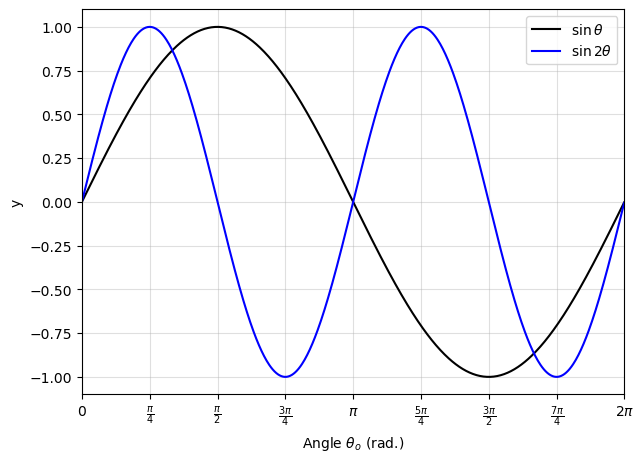

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

theta = np.arange(0, 2*np.pi, 0.01)
y1 = np.sin(theta)
y2 = np.sin(2*theta)

fig = plt.figure(figsize=(7,5), dpi=100)
ax = fig.add_subplot(111)
ax.grid(True, alpha=0.4)

ax.plot(theta, y1, 'k-', lw=1.5, label=r'$\sin\theta$')
ax.plot(theta, y2, 'b-', lw=1.5, label=r'$\sin 2\theta$')

# Set ticks every pi/4
xticks = np.arange(0, 2*np.pi + np.pi/4, np.pi/4)
ax.set_xlim(0, 2*np.pi)
ax.set_xticks(xticks)

# Generate reduced pi-fraction labels
xtick_labels = []
for x in xticks:
    frac = Fraction(x/np.pi).limit_denominator()
    if frac == 0:
        label = r"$0$"
    elif frac.denominator == 1:
        # Integer multiples of pi
        if frac.numerator == 1:
            label = r"$\pi$"
        else:
            label = rf"${frac.numerator}\pi$"
    else:
        # Proper fractions
        if frac.numerator == 1:
            label = rf"$\frac{{\pi}}{{{frac.denominator}}}$"
        else:
            label = rf"$\frac{{{frac.numerator}\pi}}{{{frac.denominator}}}$"
    xtick_labels.append(label)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel("Angle $\\theta_o$ (rad.)")
ax.set_ylabel("y")

ax.legend(loc='best')

plt.show()


- **What will be the range for a projectile on the Moon?**

The range would be $6\times$ greater due to the inverse proportionality to $g$.  *Recall the example with the time-of-flight on the Moon.*

- **At what angle $\theta_o$ will the range be maximized?**

We can see from the above Python figure that the $\sin{2\theta}$ will be first maximized at $\theta_o = \pi/4$ (or $45^\circ$), where a second maximum occurs at $\theta_o = 5\pi/4$ (or $225^\circ$).  However, we ignore the second maximum because it is pointed behind the launch point and below the horizon!

```{admonition} Maximum Angle (Calculus-framing)
:class: tip,dropdown

We want to identify the angle $\theta_o$, where the range is maximized.  Using the same procedure as other maximization problems, we find the derivative and set it equal to zero.  In this case, we have

\begin{align*}
\frac{dR}{d\theta_o} &= \frac{v_o^2}{g}\frac{d(\sin{2\theta_o})}{d\theta_o} = 0, \\
&= \frac{2v_o^2}{g}\cos{2\theta_o} = 0.
\end{align*}

We use the points where $\cos{2\theta_o} = 0$ to maximize the range, which results in 

\begin{align*}
2\theta_o &= \frac{n\pi}{2}, \quad (n=1,3,5,\ldots) \\
\theta_o &= \frac{n\pi}{4}, \quad (n=1,3,5,\ldots)
\end{align*}

where we take only the first integer $n=1$ to get

$$ \theta_o = \frac{\pi}{4},\ \text{or } 45^\circ. $$

```

We have neglected air resistance, where the maximum angle is somewhat smaller if it is considered (see Figure {numref}`{number}<air-resistance-fig>`).  Notice that (in the case of air resistance), there can be two angles with the same range but different maximum heights.

```{figure-md} air-resistance-fig
<img src="https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20251118.192121/resources/4434294de4fb4a60ad8eb9462876b6e370d5cd85" alt="air resistance"  style="max-width:60%; height:auto;">

Image Credit: Openstax
```

```{admonition} Interactive Simulation: Hydrogen Atom Models
:class: tip

<iframe
  src="https://phet.colorado.edu/sims/html/projectile-motion/latest/projectile-motion_en.html"
  width="100%"
  height="600px"
  style="border: none;"
  allowfullscreen
  loading="lazy">
</iframe>

Use this PHET simulation to explore projectile motion in terms of the launch angle and initial velocity. Adjust parameters and observe how predicted projectile range and height differs between models.
```

```{exercise}
:class: etamu-exercise

**The Problem**

> A golfer encounters two different situations on different holes. On the second hole they are 120 m from the green and want to hit the ball 90 m and let it run onto the green. They angle the shot low to the ground at $30^\circ$ to the horizontal to let the ball roll after impact. On the fourth hole they are 90 m from the green and want to let the ball drop with a minimum amount of rolling after impact. Here, they angle the shot at $70^\circ$ to the horizontal to minimize rolling after impact. Both shots are hit and impacted on a level surface.  
>  
> (a) What is the initial speed of the ball at the second hole?  
> (b) What is the initial speed of the ball at the fourth hole?  
> (c) Write the trajectory equation for both cases.  
> (d) Graph the trajectories.

---

**The Model**

Each golf shot is modeled as ideal projectile motion. The ball is launched and lands at the same height on level ground, air resistance is neglected, and the only acceleration is gravity. Under these assumptions, the horizontal range depends on the launch speed and angle through the factor $\sin(2\theta_0)$, and the path of the ball can be written as a quadratic function of $x$.

---

**The Math**

We use $g = 9.81\ \text{m/s}^2$ and the measured range $R = 90\ \text{m}$, which limits the final numerical results to two significant figures.

For projectile motion on level ground, the range is

$$
R = \frac{v_0^2\sin(2\theta_0)}{g}.
$$

Solving for the launch speed,

\begin{align*}
Rg &= v_0^2\sin(2\theta_0),\\
v_0^2 &= \frac{Rg}{\sin(2\theta_0)},\\
v_0 &= \sqrt{\frac{Rg}{\sin(2\theta_0)}}.
\end{align*}

For the second hole **(b)** with $\theta_0 = 30^\circ$,

$$
v_0 = \sqrt{\frac{(90)(9.81)}{\sin(60^\circ)}} = 32\ \text{m/s}.
$$

For the fourth hole **(d)** with $\theta_0 = 70^\circ$,

$$
v_0 = \sqrt{\frac{(90)(9.81)}{\sin(140^\circ)}} = 37\ \text{m/s}.
$$

To write the trajectory **(c)**, we use the projectile path equation

$$
y(x) = x\tan\theta_0 - \frac{g}{2(v_0\cos\theta_0)^2}x^2.
$$

For the $30^\circ$ shot,

$$
y(x) = x\tan(30^\circ) - \frac{9.81}{2\left[(32)\cos(30^\circ)\right]^2}x^2 \approx 0.58x - 0.0064x^2.
$$

For the $70^\circ$ shot,

$$
y(x) = x\tan(70^\circ) - \frac{9.81}{2\left[(37)\cos(70^\circ)\right]^2}x^2 \approx 2.8x - 0.031x^2.
$$

---

**The Conclusion**

To carry the ball $90\ \text{m}$ on level ground, the golfer must launch it at $32\ \text{m/s}$ for a $30^\circ$ shot and at $37\ \text{m/s}$ for a $70^\circ$ shot. Even though both shots have the same range, the high-angle shot requires a larger launch speed because $\sin(2\theta_0)$ is smaller at $70^\circ$ than it is at $30^\circ$.

---

**The Verification**

We verify the results numerically **(d)** by computing the launch speeds from the range equation, generating the two trajectories, and confirming that both satisfy $y(90\ \text{m}) \approx 0$.

```python
# Verification of golf shot trajectories
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
R = 90.0

theta1 = np.radians(30.0)
theta2 = np.radians(70.0)

v01 = np.sqrt(R*g/np.sin(2*theta1))
v02 = np.sqrt(R*g/np.sin(2*theta2))

x = np.linspace(0, R, 400)

y1 = x*np.tan(theta1) - g*x**2/(2*(v01*np.cos(theta1))**2)
y2 = x*np.tan(theta2) - g*x**2/(2*(v02*np.cos(theta2))**2)

print(f"Second hole: v0 = {v01:.0f} m/s")
print(f"Fourth hole: v0 = {v02:.0f} m/s")
print(f"y1(R) = {y1[-1]:.3f} m, y2(R) = {y2[-1]:.3f} m")

fig = plt.figure(figsize=(7,5), dpi=100)
ax = fig.add_subplot(111)
ax.grid(True, alpha=0.4)

ax.plot(x, y1, 'k-', lw=1.5, label=r"$30^\circ$ shot")
ax.plot(x, y2, 'b-', lw=1.5, label=r"$70^\circ$ shot")

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_xlim(0, 90)
ax.set_ylim(bottom=0)
ax.legend(loc="best")

plt.tight_layout()
plt.show()
```


## Uniform and Nonuniform Circular Motion
### Centripetal Acceleration
### **Example Problem**: Creating an Acceleration of 1 $g$ 
### Equations of Motion for Uniform Circular Motion

### **Example Problem**: Circular Motion of a Proton
### Nonuniform Circular Motion
### **Example Problem**: Total Acceleration during Circular Motion




## Relative Motion in One and Two Dimensions
### Reference Frames
### Relative Motion in 1D
### Relative Velocity in 2D
### **Example Problem**: Motion of a Car Relative to a Truck
### **Example Problem**: Flying a Plane in a Wind